# Sphere function
---
Description:

- Optimization (min)
- Single-objective
- Constraints (no)
---

The general equation is given by:

- $f(\mathbf{x}) = \sum_{i=1}^{M} x^2_i$, with  $-\infty \le x_i \le +\infty$,

and global minimum found at:

- $f(x_1, x_2, ..., x_M) = f(0, 0, ..., 0) = 0$.

### First we import python libraries and set up the directory of our code.

In [4]:
import os, sys
import numpy as np
from math import fsum, isclose
from matplotlib import pyplot as plt

PROJECT_DIR = os.path.abspath('..')
sys.path.append(PROJECT_DIR)

### Here we import all our custom GA code.

In [5]:
# Import main classes.
from pygenalgo.genome.gene import Gene
from pygenalgo.genome.chromosome import Chromosome
from pygenalgo.engines.auxiliary import cost_function
from pygenalgo.engines.island_model_ga import IslandModelGA

# Import Selection Operator(s).
from pygenalgo.operators.selection.linear_rank_selector import LinearRankSelector

# Import Crossover Operator(s).
from pygenalgo.operators.crossover.meta_crossover import MetaCrossover

# Import Mutation Operator(s).
from pygenalgo.operators.mutation.meta_mutator import MetaMutator

# Import Migration Operator(s).
from pygenalgo.operators.migration.clockwise_migration import ClockwiseMigration

### Define the sphere function, which plays also the role of the 'fitness' function.

In addition, we define the 'rand_fx' which takes the role of the 'random()' method of the Genes. Every time we
want to 'mutate' a gene this function will be called that returns 'valid', but random values for the gene.

In [6]:
# Sphere function.
@cost_function(minimize=True)
def fun_Sphere(individual: Chromosome):

    # Compute the shpere function.
    f_value = fsum([xi.value**2 for xi in individual.genome])

    # Condition for termination.
    solution_found = isclose(f_value, 0.0, rel_tol=1.0e-5)
    
    # Return the solution tuple.
    return f_value, solution_found
# _end_def_

# Random number generator.
rng = np.random.default_rng()

# Random function: ~N(0,1).
# Since 'xi' are allowed to take any real value in [-inf, +inf], by setting this
# to the Normal(0, 1) essentially we can get both negative and positive values.
boundary_x = lambda: rng.normal()

Here we set the GA parameters, such as number of genes, number of chromosomes, etc. Note that in this case each
gene has the same random() function (set by 'boundary_x'). But if the problem demands otherwise it is easy to set a 
different random() function for each gene.

In [7]:
# Define the number of genes.
M = 10

# Define the number of chromosomes.
N = 100

# Draw random samples for the initial points.
x_init = rng.uniform(-50.0, +50.0, size=(N, M))

# Initial population.
population = [Chromosome([Gene(x_init[i, j], boundary_x)
                          for j in range(M)], np.nan, True)
              for i in range(N)]

# Fix random generator.
IslandModelGA.set_seed(0)

# Create the IslandModelGA object that will carry on the optimization.
test_GA = IslandModelGA(initial_pop=population,
                        fit_func=fun_Sphere, num_islands=4,
                        select_op=LinearRankSelector(),
                        mutate_op=MetaMutator(),
                        crossx_op=MetaCrossover(),
                        migrate_op=ClockwiseMigration())

### Optimization process.

Here we call the GA object (either directly, or through the method run()). We set a number of parameter, such as the maximum iterations (i.e. epochs), tolerance for the fitness convergences, etc.

In [8]:
test_GA(epochs=2500, elitism=True, f_tol=1.0e-8, allow_migration=True, n_periods=10, adapt_probs=True)

Parallel evolution in progress with 4 islands ...
Final Avg. Fitness = -0.1709.
Elapsed time: 13.649 seconds.


In [9]:
# Extract the optimal solution from the GA.
optimal_solution = test_GA.best_chromosome()

# Extract the fitness value from the optimal solution.
optimal_fit = -optimal_solution.fitness

# Display the (final) optimal value.
print(f"Minimum Found: {optimal_fit:.6f}\n")

# Display each gene value separately.
for i, xi in enumerate(optimal_solution.values()):
    print(f"x{i} = {xi:>10.6f}")
# _end_for_

# True minimum: f(0.0, 0.0, ..., 0.0) = 0.0

Minimum Found: 0.000001

x0 =  -0.000337
x1 =   0.000269
x2 =  -0.000184
x3 =   0.000308
x4 =  -0.000039
x5 =  -0.000337
x6 =  -0.000337
x7 =  -0.000104
x8 =  -0.000337
x9 =  -0.000337


### Plot the adaptable parameters.

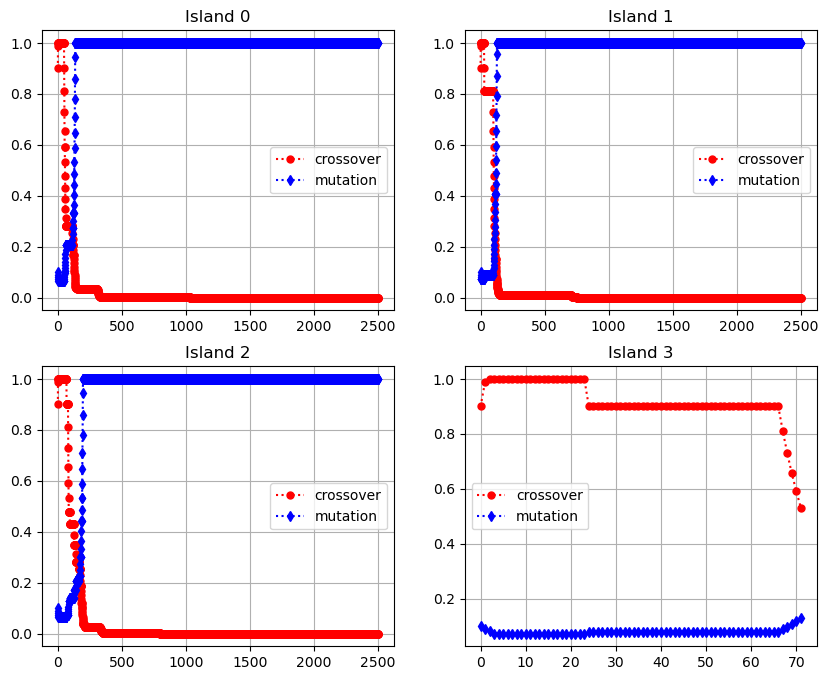

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].plot(test_GA.stats[0]["prob_crossx"], 'ro:', markersize=5, label="crossover")
axs[0, 0].plot(test_GA.stats[0]["prob_mutate"], 'bd:', markersize=5, label="mutation")
axs[0, 0].set_title('Island 0')
axs[0, 0].grid()
axs[0, 0].legend()

axs[0, 1].plot(test_GA.stats[1]["prob_crossx"], 'ro:', markersize=5, label="crossover")
axs[0, 1].plot(test_GA.stats[1]["prob_mutate"], 'bd:', markersize=5, label="mutation")
axs[0, 1].set_title('Island 1')
axs[0, 1].grid()
axs[0, 1].legend()

axs[1, 0].plot(test_GA.stats[2]["prob_crossx"], 'ro:', markersize=5, label="crossover")
axs[1, 0].plot(test_GA.stats[2]["prob_mutate"], 'bd:', markersize=5, label="mutation")
axs[1, 0].set_title('Island 2')
axs[1, 0].grid()
axs[1, 0].legend()

axs[1, 1].plot(test_GA.stats[3]["prob_crossx"], 'ro:', markersize=5, label="crossover")
axs[1, 1].plot(test_GA.stats[3]["prob_mutate"], 'bd:', markersize=5, label="mutation")
axs[1, 1].set_title('Island 3')
axs[1, 1].grid()
axs[1, 1].legend()

plt.show()

### End of file